In [1]:
from ml.stats import rmse
from ml.dataset import load_csv, split_train_test
from ml.algorithms.normalization import MinMaxScaler
from ml.models.linear import PolynomialRegression
from ml.algorithms.optimization import OrdinaryLeastSquares

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(25)

## Q2

In [2]:
X, y = load_csv('./datasets/california.csv')

In [3]:
# util funcion to plot RMSE
def plot_train_test_rmse(train_rmse, test_rmse, title, xlabel, ylim, text_y):
    plt.figure(figsize=(10,6))
    num = np.arange(len(train_rmse))
    
    plt.bar(num*3, train_rmse, 1, label="Train", color='paleturquoise')
    plt.bar((num*3)+1, test_rmse, 1, label="Test", color='navajowhite')

    for i in num:
        plt.text(i*3, text_y, "{:.3f}".format(train_rmse[i]), 
            ha='center', rotation=90, fontsize=10, color='black', weight="bold")

        plt.text((i*3)+1, text_y, "{:.3f}".format(test_rmse[i]), 
            ha='center', rotation=90, fontsize=10, color='black', weight="bold")

    plt.xticks((num*3)+0.5, labels=num.astype(np.str_))
    
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel("RMSE", fontsize=20)
    plt.ylim(0, ylim)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

### Q2.a
#### Split dataset in train (80%) and test (20%) with random shuffling

In [4]:
X_train, y_train, X_test, y_test = split_train_test(X, y, 0.8, shuffle=True)

### Q2.b
#### Train polynomial regression models with degrees from 1 to 11

In [5]:
poly_ols_all = []

for degree in range(1, 12):
    ols = OrdinaryLeastSquares()
    poly_ols = PolynomialRegression(ols, degree, dataScaler=MinMaxScaler)
    
    poly_ols.fit(X_train, y_train)
    
    poly_ols_all.append(poly_ols)

### Q2.c
#### Report train and test RMSE for each trained model

Degree: 1 - RMSE train: 0.7285683627278899 - RMSE test: 0.6991090502828239
Degree: 2 - RMSE train: 0.6717569985557297 - RMSE test: 0.6610228462189116
Degree: 3 - RMSE train: 0.6417751134261005 - RMSE test: 0.6700963610406577
Degree: 4 - RMSE train: 0.6334347899029371 - RMSE test: 0.6805592640100951
Degree: 5 - RMSE train: 0.6275620881372077 - RMSE test: 0.7638733641486515
Degree: 6 - RMSE train: 0.6271277085091493 - RMSE test: 2.0476539542587866
Degree: 7 - RMSE train: 0.6257691547016722 - RMSE test: 2.230760005215873
Degree: 8 - RMSE train: 0.6246589942690715 - RMSE test: 14.548554071359012
Degree: 9 - RMSE train: 0.6246627452475251 - RMSE test: 15.622616408411178
Degree: 10 - RMSE train: 0.6249616518822374 - RMSE test: 17.945232264761252
Degree: 11 - RMSE train: 0.621743888224297 - RMSE test: 19.724449086707267


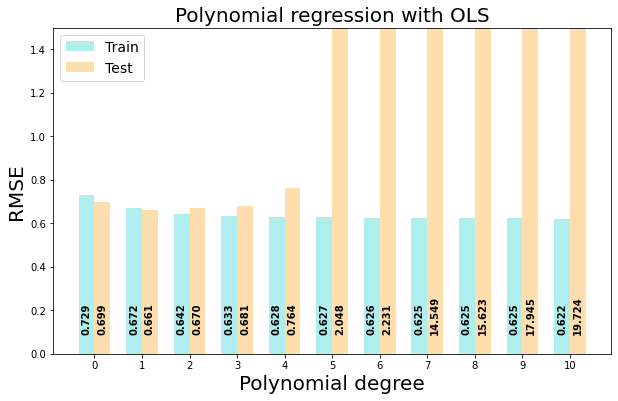

In [6]:
rmse_poly_ols_train = []
rmse_poly_ols_test = []

degree = 1
for poly_ols in poly_ols_all:
    # compute RMSE
    rmse_train = rmse(y_train, poly_ols.predict(X_train))
    rmse_test = rmse(y_test, poly_ols.predict(X_test))
    
    # store RMSE
    rmse_poly_ols_train.append(rmse_train)
    rmse_poly_ols_test.append(rmse_test)

    # print RMSE
    print("Degree:", degree, "- RMSE train:", rmse_train, "- RMSE test:", rmse_test)
    degree += 1

# plot RMSE
plot_train_test_rmse(rmse_poly_ols_train, rmse_poly_ols_test,
    title="Polynomial regression with OLS", xlabel="Polynomial degree", ylim=1.5, text_y=0.1)

### Q2.d

#### Train polynomial regression models with degrees 1 to 11 and regularization

In [7]:
poly_ols_reg_all = []

for degree in range(1, 12):
    ols = OrdinaryLeastSquares(regularization=0.001)
    poly_ols = PolynomialRegression(ols, degree, dataScaler=MinMaxScaler)
    poly_ols.fit(X_train, y_train)

    poly_ols_reg_all.append(poly_ols)

#### Report train and test RMSE

Degree: 1 - RMSE train: 0.7285684239935276 - RMSE test: 0.6991021635410078
Degree: 2 - RMSE train: 0.6851347957307385 - RMSE test: 0.6640762259853522
Degree: 3 - RMSE train: 0.6687256281942463 - RMSE test: 0.6458205683354129
Degree: 4 - RMSE train: 0.6646702143791715 - RMSE test: 0.6503327948313857
Degree: 5 - RMSE train: 0.6635110253258235 - RMSE test: 0.6563121989445376
Degree: 6 - RMSE train: 0.6627927856566462 - RMSE test: 0.660276346197021
Degree: 7 - RMSE train: 0.6623779363743932 - RMSE test: 0.662339729222643
Degree: 8 - RMSE train: 0.662144304771698 - RMSE test: 0.6632246398848783
Degree: 9 - RMSE train: 0.661937240939229 - RMSE test: 0.6634482176735356
Degree: 10 - RMSE train: 0.6616636037115412 - RMSE test: 0.6632979031539026
Degree: 11 - RMSE train: 0.6612963999756539 - RMSE test: 0.6629237066097983


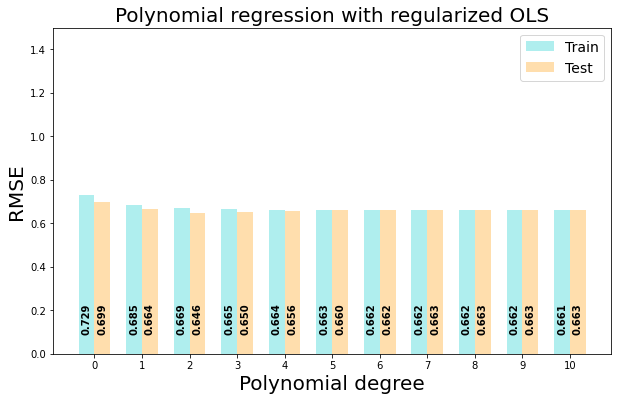

In [8]:
rmse_poly_ols_reg_train = []
rmse_poly_ols_reg_test = []

degree = 1
for poly_ols in poly_ols_reg_all:
    # compute RMSE
    rmse_train = rmse(y_train, poly_ols.predict(X_train))
    rmse_test = rmse(y_test, poly_ols.predict(X_test))

    # store RMSE
    rmse_poly_ols_reg_train.append(rmse_train)
    rmse_poly_ols_reg_test.append(rmse_test)

    # print RMSE
    print("Degree:", degree, "- RMSE train:", rmse_train, "- RMSE test:", rmse_test)
    degree += 1

# plot RMSE
plot_train_test_rmse(rmse_poly_ols_reg_train, rmse_poly_ols_reg_test,
    title="Polynomial regression with regularized OLS", xlabel="Polynomial degree", ylim=1.5, text_y=0.1)